In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
quality = pd.read_csv("./Data/Quality.csv", names=["X1", "X2", "Y"])

quality

,X1,X2,Y
0,0.051267,0.699560,1.0
1,-0.092742,0.684940,1.0
2,-0.213710,0.692250,1.0
3,-0.375000,0.502190,1.0
4,-0.513250,0.465640,1.0
...,...,...,...
113,-0.720620,0.538740,0.0
114,-0.593890,0.494880,0.0
115,-0.484450,0.999270,0.0
116,-0.006336,0.999270,0.0


In [3]:
X = quality[["X1","X2"]]
y = quality["Y"]

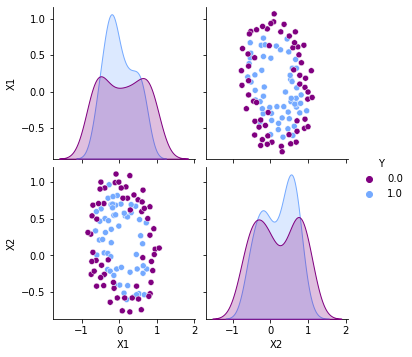

In [4]:

palette = {1: '#75AAFF', 
    0 : 'purple',
    }

g = sns.pairplot(quality, vars =quality.columns[0:2],
                 hue="Y", palette=palette)

## transform data to high dimensions

In [26]:
def calc_high_dim(x1, x2):
    high_dim = [x1,x2]
    for i in range(7):
        for j in range(7):
            if((i+j < 7) and (i+j>1)):
                high_dim.append((x1**i)*(x2**j))
                
    return high_dim

In [5]:
for i in range(7):
    for j in range(7):
        if((i+j < 7) and (i+j>1)):
            X["X1^"+str(i)+"X2^"+str(j)] = (X["X1"]**i)*(X["X2"]**j)


In [6]:
quality

,X1,X2,Y
0,0.051267,0.699560,1.0
1,-0.092742,0.684940,1.0
2,-0.213710,0.692250,1.0
3,-0.375000,0.502190,1.0
4,-0.513250,0.465640,1.0
...,...,...,...
113,-0.720620,0.538740,0.0
114,-0.593890,0.494880,0.0
115,-0.484450,0.999270,0.0
116,-0.006336,0.999270,0.0


In [64]:
X.head()

,X1,X2,X1^0X2^2,X1^0X2^3,X1^0X2^4,X1^0X2^5,X1^0X2^6,X1^1X2^1,X1^1X2^2,X1^1X2^3,...,X1^3X2^0,X1^3X2^1,X1^3X2^2,X1^3X2^3,X1^4X2^0,X1^4X2^1,X1^4X2^2,X1^5X2^0,X1^5X2^1,X1^6X2^0
0,0.051267,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.035864,0.025089,0.017551,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,-0.092742,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.063523,-0.043509,-0.029801,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,-0.213710,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.147941,-0.102412,-0.070895,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,-0.375000,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.188321,-0.094573,-0.047494,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,-0.513250,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.238990,-0.111283,-0.051818,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


## train test split 

In [7]:
from itertools import chain

def _indexing(x, indices):
    if hasattr(x, 'shape'):
        return x[indices]

    return [x[idx] for idx in indices]

def split_train_test(*arrays, test_size=0.35, shufffle=True, random_seed=1):

    assert 0 < test_size < 1
    assert len(arrays) > 0
    length = len(arrays[0])
    for i in arrays:
        assert len(i) == length

    n_test = int(np.ceil(length*test_size))
    n_train = length - n_test

    if shufffle:
        perm = np.random.RandomState(random_seed).permutation(length)
        test_indices = perm[:n_test]
        train_indices = perm[n_test:]
    else:
        train_indices = np.arange(n_train)
        test_indices = np.arange(n_train, length)

    return list(chain.from_iterable((_indexing(x, train_indices), _indexing(x, test_indices)) for x in arrays))


X_train, X_test, y_train, y_test = split_train_test(X.values, y.values)

In [8]:
def calc_accuracy(y_true , y_pred):
	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)


## Logistic Regression with L2 Regularization 

88.1


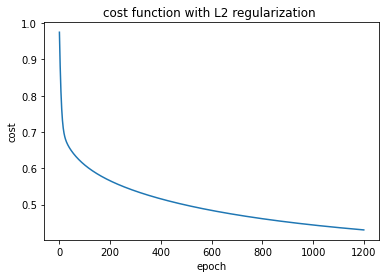

accuracy , precision , recall , f1-score : (88.095, 82.353, 87.5, 84.848)


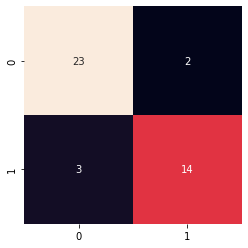

In [25]:
class LogisticRegression:
    def __init__(self):
        self.losses = []

    def fit(self, X, y, epoch, lr, l2_coef):
        self.X = X
        self.y = y
        self.lr = lr
        self.l2_coef = l2_coef
        self.w = np.ones(X.shape[1])/2
        self.b = 0
        for i in range(epoch):
            #print(self.w)
            wx_b = np.matmul(self.w, self.X.transpose()) + self.b
            pred = self._sigmoid(wx_b)
            loss = self._compute_loss(self.y, pred)
            self.losses.append(loss)
            self._update_weights(self.X, self.y, pred)

    
    def predict(self,x):
        wx_b = np.matmul( x, self.w.transpose()) + self.b
        pred = self._sigmoid(wx_b).astype(np.float32)
        pred = np.where(pred>=.5, 1, 0)
        return pred
        
    def _regulizer_term(self):
        return np.linalg.norm(self.w)

    def _compute_loss(self, y_true, y_pred, eps = 1e-6):
        
        loss = - (y_true * np.log(y_pred + eps) + (1-y_true) * np.log(1 - y_pred +eps)) + self._regulizer_term()*self.l2_coef
        return np.mean(loss)


    def _update_weights(self, x, y_true, y_pred):
        err = y_pred - y_true
        dw = np.matmul(x.transpose(), err) - 2*self.l2_coef*self.w
        db = np.mean(err)

        self.w = self.w - self.lr*dw
        self.b = self.b - self.lr*db

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-abs(x))
            return 1 / (1 + z)
        else:
            z = np.exp(-abs(x))
            return z / (1 + z)


def make_confusing_matrix( y_true, y_pred, class_number, labels= [0,1]):
    confusion_matrix = np.zeros((class_number, class_number))
    for i in range(class_number):
        for j in range(class_number):
            confusion_matrix[i,j] = np.sum((y_true ==labels[i])
                                             &(y_pred == labels[j]) )

    return confusion_matrix.astype(np.int32)    


def calc_accuracy_precision_recall_f1(confusion_matrix):
    tp = confusion_matrix[1,1]
    fn = confusion_matrix[0,1]
    fp = confusion_matrix[1,0]
    tn = confusion_matrix[0,0]

    accuracy = round(float((tp+tn)/(tp+fp+fn+tn))*100, 3)
    precision = round(float(tp/(tp+fp))*100, 3)
    recall = round(float(tp/(tp+fn))*100,3)
    f1 = round(float(2*tp/(2*tp+fp+fn))*100,3)

    return accuracy, precision, recall, f1

clf = LogisticRegression()
clf.fit(X_train, y_train, 1200, .012, 0)
plt.plot(clf.losses)
plt.title("cost function with L2 regularization ")
plt.xlabel("epoch")
plt.ylabel("cost")
y_pred = clf.predict(X_test)
print(calc_accuracy(y_test, y_pred))
plt.show()
conf_matrix = make_confusing_matrix( y_test, y_pred,2)
sns.heatmap(conf_matrix,  square=True, 
annot= True ,  fmt ="d", cbar= False, 
         
)
    
print("accuracy , precision , recall , f1-score : " + str(calc_accuracy_precision_recall_f1(conf_matrix)))


## Plot decision boundary

In [52]:
a = int(min(quality["X1"])*100)
b =int(max(quality["X1"])*100)
c =int(min(quality["X2"])*100)
d =int(max(quality["X2"])*100)

In [53]:
my_map = np.zeros((len(np.arange(a,b)), len(np.arange(c,d)))) + .5
for i,h in enumerate(np.arange(a,b)):
    for j,k in enumerate(np.arange(c,d)):
        sample = np.array(calc_high_dim(h/100, k/100)).reshape(1,27)
        my_map[i,j] = clf.predict(sample)

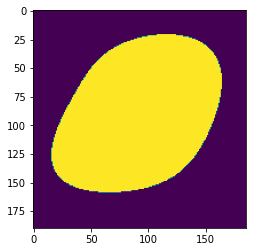

In [54]:
plt.imshow(my_map)